In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers.merge import Concatenate
import matplotlib.gridspec as gridspec

Using TensorFlow backend.


In [12]:
#https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/

url = "https://raw.githubusercontent.com/dnishimoto/python-deep-learning/master/creditcard.csv"

creditcard = pd.read_csv(url)

creditcard.columns = [x.lower() for x in creditcard.columns]
creditcard.rename(columns = {'class': 'fraud'}, inplace = True)
print(creditcard.fraud.value_counts(dropna = False))

X = creditcard.drop("fraud", axis = 1)
y = creditcard["fraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, stratify = y, random_state = 42)
timeSteps=20
X_train = np.resize(X_train,(X_train.shape[0],timeSteps,X_train.shape[1]))


samples=X_train.shape[0]

features=len(X.columns)

#X_train=np.array(X_train).reshape(1,timeSteps,1)
#y_train=np.array(y_train).reshape(1,timeSteps,1)


0    56772
1      102
Name: fraud, dtype: int64


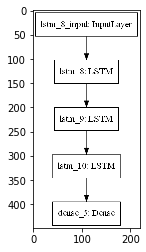

In [19]:
#1. The LSTM input layer must be 3D.
#2. The meaning of the 3 input dimensions are: samples, time steps, and features.
#3. The LSTM input layer is defined by the input_shape argument on the first hidden layer.
#4. The input_shape argument takes a tuple of two values that define the number of time steps and features.
#5. The number of samples is assumed to be 1 or more.

#Samples. One sequence is one sample. A batch is comprised of one or more samples.
#Time Steps. One time step is one point of observation in the sample.
#Features. One feature is one observation at a time step.



#input layer expects a 3D array of data when fitting the model and when making predictions, 
#even if specific dimensions of the array contain a single value, e.g. one sample or one feature.

#The input shape is supposed in the format (no_of_samples,no_of_timesteps,features)

#The input to every LSTM layer must be three-dimensional.
# expected input data shape: (batch_size, timesteps, data_dim)
model = Sequential()
model.add(LSTM(100, activation='sigmoid', return_sequences=True,
               input_shape=(timeSteps, features)))  # returns a sequence of vectors of dimension 

model.add(LSTM(features, activation='sigmoid', return_sequences=True))  # returns a sequence of vectors of dimension 
model.add(LSTM(20, activation='sigmoid'))  # return a single vector of dimension 
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])

#model.compile(loss='categorical_crossentropy',
#validation_data              optimizer='rmsprop',
#metrics=['accuracy'])





plot_model(model, to_file='model.png')
img=plt.imread('model.png')
plt.imshow(img)
plt.show()



In [20]:
# Generate dummy training data
#x_train = np.random.random((1000, timesteps, data_dim))
#y_train = np.random.random((1000, num_classes))

# Generate dummy validation data
#x_val = np.random.random((100, timesteps, data_dim))
#y_val = np.random.random((100, num_classes))

model.fit(X_train, y_train,
          batch_size=64, 
          epochs=5,
          #validation_data=(x_val, y_val)
         )

Epoch 1/5
38105/38105 [==============================] - 19s 496us/step - loss: 0.0513 - accuracy: 0.9932
Epoch 2/5
38105/38105 [==============================] - 19s 506us/step - loss: 0.0132 - accuracy: 0.9982
Epoch 3/5
38105/38105 [==============================] - 19s 492us/step - loss: 0.0132 - accuracy: 0.9982
Epoch 4/5
38105/38105 [==============================] - 21s 546us/step - loss: 0.0134 - accuracy: 0.9982
Epoch 5/5
38105/38105 [==============================] - 21s 553us/step - loss: 0.0132 - accuracy: 0.9982


C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


0
56874


<function matplotlib.pyplot.show(*args, **kw)>

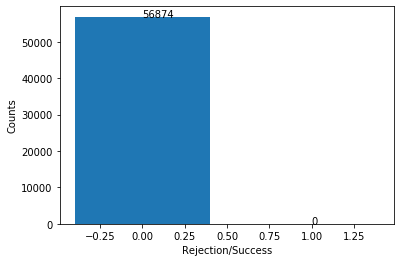

In [22]:
scalar = MinMaxScaler()
scalar.fit(X)
X_scaled = scalar.transform(X)

X_scaled = np.resize(X_scaled,(X_scaled.shape[0],timeSteps,X_scaled.shape[1])) 

y_pred=model.predict(X_scaled)
buffer=y_pred.flatten()
#print(buffer)
yes=buffer[buffer>=.9]
no=buffer[buffer<.9]
print(len(yes))
print(len(no))

counts=[len(no),len(yes)]
plt.bar(range(2),counts)
plt.ylabel("Counts")
plt.xlabel("Rejection/Success")

plt.annotate(str(len(no)), xy=(0,len(no)))
plt.annotate(str(len(yes)), xy=(1,len(yes)))

plt.show

In [22]:
#anomalous_features = creditcard.iloc[:,1:29].columns

#plt.figure(figsize=(12,28*4))
#gs = gridspec.GridSpec(28, 1)
#for i, cn in enumerate(creditcard[anomalous_features]):
#    ax = plt.subplot(gs[i])
#    sns.distplot(creditcard[cn][creditcard.fraud == 1], bins=50)
#    sns.distplot(creditcard[cn][creditcard.fraud == 0], bins=50)
#    ax.set_xlabel('')
#    ax.set_title('histogram of feature: ' + str(cn))
#plt.show()